In [1]:
# Credit Card Fraud Detection
#This project aims to detect fraudulent credit card transactions using machine learning techniques. The dataset is highly imbalanced, so we will use techniques like SMOTE to handle class imbalance.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE  # Install imbalanced-learn if not already installed

# Set plotting style
sns.set(style="whitegrid")

In [3]:
# Load dataset
data = pd.read_csv('creditcard.csv')

# Display basic information about the dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Class
0    284315
1       492
Name: count, dtype: int64


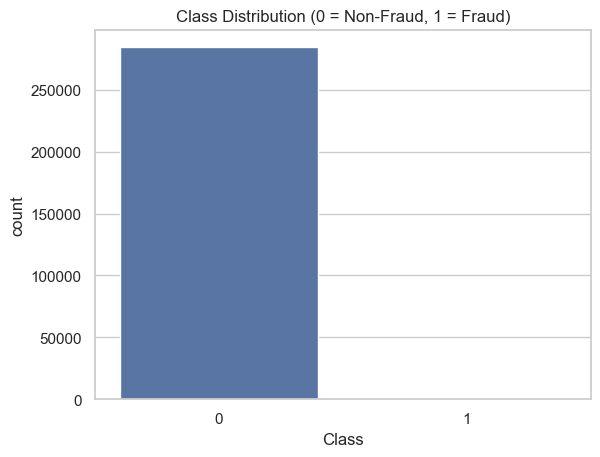

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


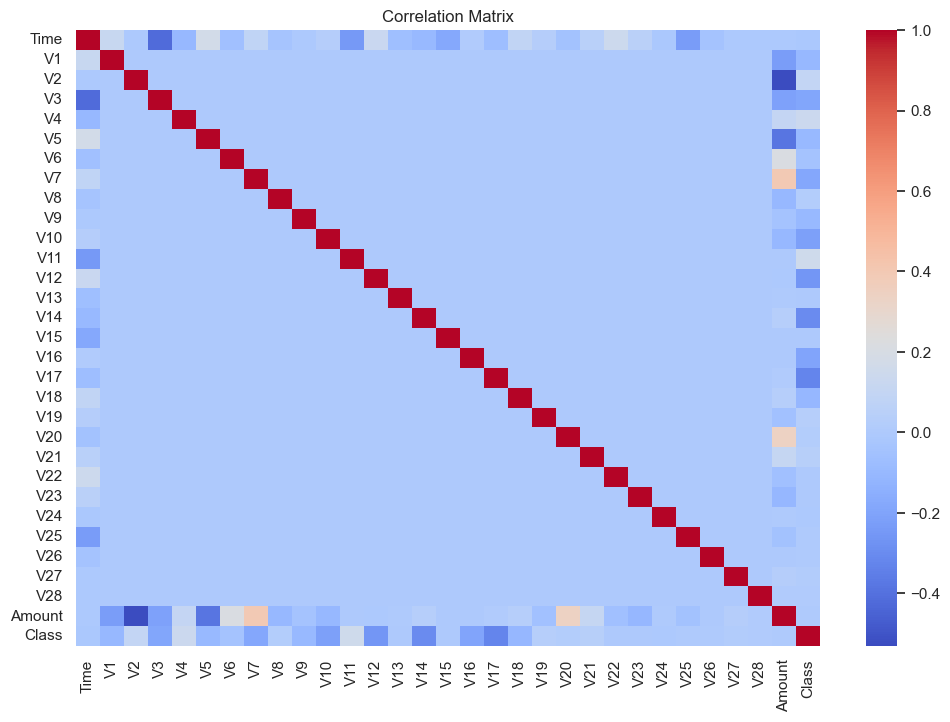

In [4]:
# Check for class imbalance
print(data['Class'].value_counts())

# Visualize class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.show()

# Check for missing values
print(data.isnull().sum())

# Visualize correlations (optional)
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Normalize 'Amount' column using StandardScaler
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Drop 'Time' column as it's not useful for modeling
data = data.drop(columns=['Time'])

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Handle class imbalance using SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())

Before SMOTE: Class
0    284315
1       492
Name: count, dtype: int64
After SMOTE: Class
0    284315
1    284315
Name: count, dtype: int64


In [6]:
# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (398041, 29)
Testing set size: (170589, 29)


In [7]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Simplified Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=50,      # Reduce number of trees (default is 100)
    max_depth=10,         # Limit tree depth (default is None)
    random_state=42       # Ensure reproducibility
)

# Train the model
print("Training started...")
rf_model.fit(X_train, y_train)
print("Training completed!")

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
from sklearn.metrics import classification_report


Training started...
Training completed!


In [9]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     85149
           1       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     85149
           1       1.00      0.98      0.99     85440

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



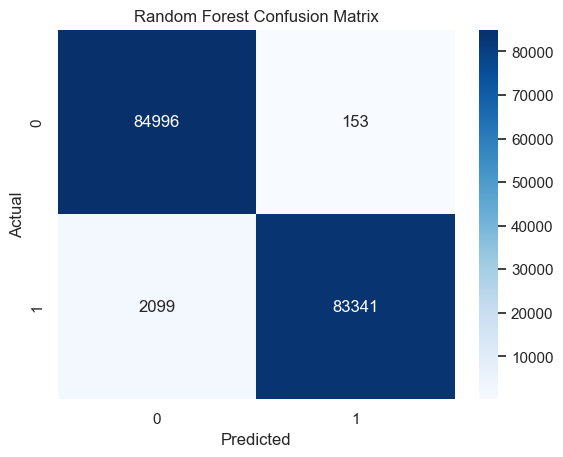

In [10]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

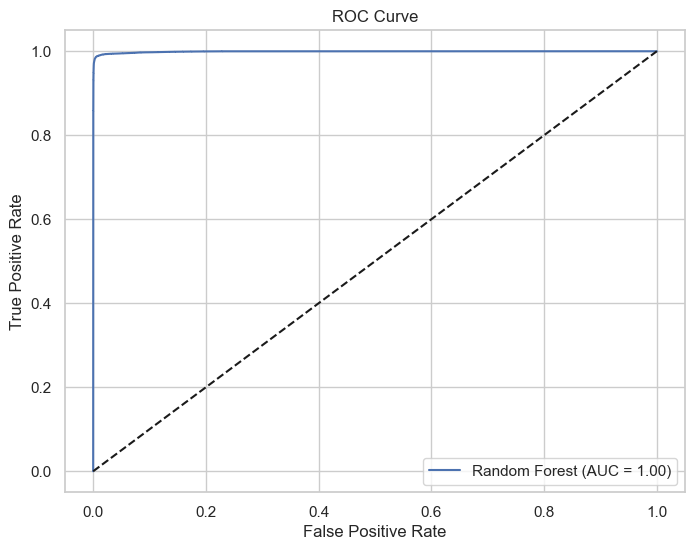

In [11]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
## Results Summary:
# Logistic Regression:
	•	Precision (Fraud) = 0.97
	•	Recall (Fraud) = 0.92
	•	F1-Score (Fraud) = 0.95
# Forest Regression:
	•	Precision (Fraud) = 1.00
	•	Recall (Fraud) = 0.98
	•	F1-Score (Fraud) = 0.99
# Model Comparison
	1.	Logistic Regression:
	•	Achieved a high F1-Score of 0.95, indicating a good balance between precision and recall.
	•	Precision was 0.97, meaning that 97% of the fraud predictions were correct.
	•	Recall was 0.92, meaning it identified 92% of the actual fraud cases.
	2.	Random Forest:
	•	Outperformed Logistic Regression with an F1-Score of 0.99, making it the better model for fraud detection.
	•	Precision was perfect at 1.00, meaning every fraud prediction made by the model was correct.
	•	Recall was 0.98, meaning it identified 98% of the actual fraud cases, which is higher than Logistic Regression.
	3.	Overall Winner: Random Forest is the better model for this dataset as it achieved higher precision, recall, and F1-Score compared to Logistic Regression.